# Over-sampling

Oversampling adalah teknik yang digunakan untuk menangani ketidakseimbangan kelas (class imbalance) dalam dataset. Ketika salah satu kelas memiliki jumlah sampel jauh lebih sedikit dibanding kelas lain, model cenderung bias terhadap kelas mayoritas.

## Tujuan Tugas
1. Menganalisa distribusi kelas dalam dataset ecoli
2. Menampilkan teknik SMOTE untuk menyeimbangkan data
3. Memvisualisasikan hasil sebelum dan sesudah SMOTE
4. Membandingkan distribusi menggunakan PCA


## Pemanggilan menggunakan Mysql

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Buat koneksi via SQLAlchemy
engine = create_engine("mysql+pymysql://root:@localhost:3306/data_psd")

query_mysql = "SELECT * FROM ecoli;"
df = pd.read_sql(query_mysql, engine)

## Visualisasi Data dengan PCA

- Mereduksi 7 fitur menjadi 2 komponen utama
- Menunjukkan variance yang dijelaskan oleh setiap komponen
- Memvisualisasikan sebaran data dalam ruang 2D

Shape awal: (336, 9)
  sequence_name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
Shape X: (336, 7)
Shape y: (336,)


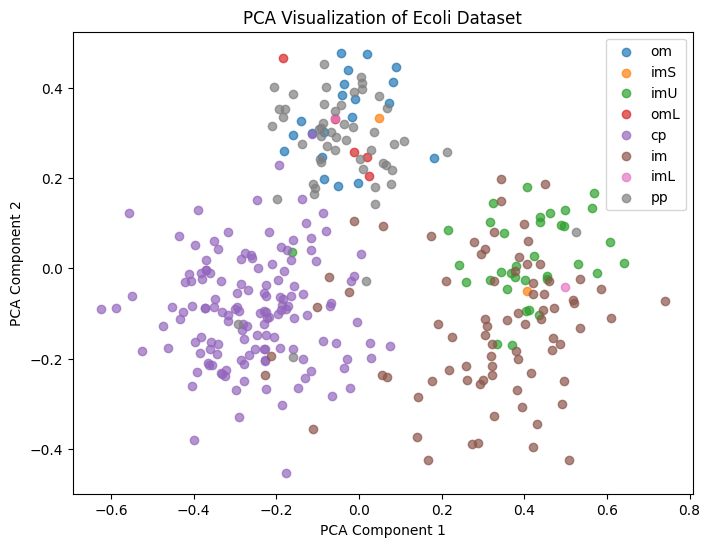

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("Shape awal:", df.shape)
print(df.head())

# Buang kolom ID (sequence_name)
df_features = df.drop(columns=["sequence_name", "class"])

# X = fitur numerik, y = label
X = df_features.values
y = df["class"].values

print("Shape X:", X.shape)
print("Shape y:", y.shape)

# PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot hasil PCA
plt.figure(figsize=(8,6))
for label in set(y):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label=label,
        alpha=0.7
    )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Ecoli Dataset")
plt.legend()
plt.show()


## Persiapan Data untuk SMOTE

1. Import library yang diperlukan untuk SMOTE (imblearn.over_sampling.SMOTE)
2. Memisahkan fitur dan target:
    - X: Features (mcg, gvh, lip, chg, aac, alm1, alm2)
    - y: Target variable (class)
3. Analisis distribusi awal menggunakan Counter() untuk melihat ketidakseimbangan

In [23]:
# Penyeimbangan Data menggunakan SMOTE
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Fitur = semua kolom numerik (drop ID & label)
X = df.drop(columns=["sequence_name", "class"])
# Target = kolom class
y = df["class"]

print("Distribusi kelas sebelum SMOTE:")
print(Counter(y))
print(f"Total sampel sebelum SMOTE: {len(y)}")
print(f"Jumlah fitur: {X.shape[1]}")

# Terapkan SMOTE
smote = SMOTE(k_neighbors=1 ,random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nDistribusi kelas setelah SMOTE:")
print(Counter(y_res))
print(f"Total sampel setelah SMOTE: {len(y_res)}")
print(f"Jumlah fitur: {X_res.shape[1]}")


Distribusi kelas sebelum SMOTE:
Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Total sampel sebelum SMOTE: 336
Jumlah fitur: 7

Distribusi kelas setelah SMOTE:
Counter({'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143})
Total sampel setelah SMOTE: 1144
Jumlah fitur: 7


## Analisis PCA Data Setelah SMOTE

Bagian ini melakukan analisis mendalam terhadap distribusi fitur setelah SMOTE menggunakan PCA:

1. Kiri → PCA sebelum SMOTE (kelas minoritas lebih sedikit).
2. Kanan → PCA sesudah SMOTE (kelas lebih seimbang).

Distribusi kelas sebelum SMOTE: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi kelas sesudah SMOTE: Counter({'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143})
Jumlah data sintetis yang dibuat per kelas: {'cp': 0, 'im': 66, 'imS': 141, 'imL': 141, 'imU': 108, 'om': 123, 'omL': 138, 'pp': 91}


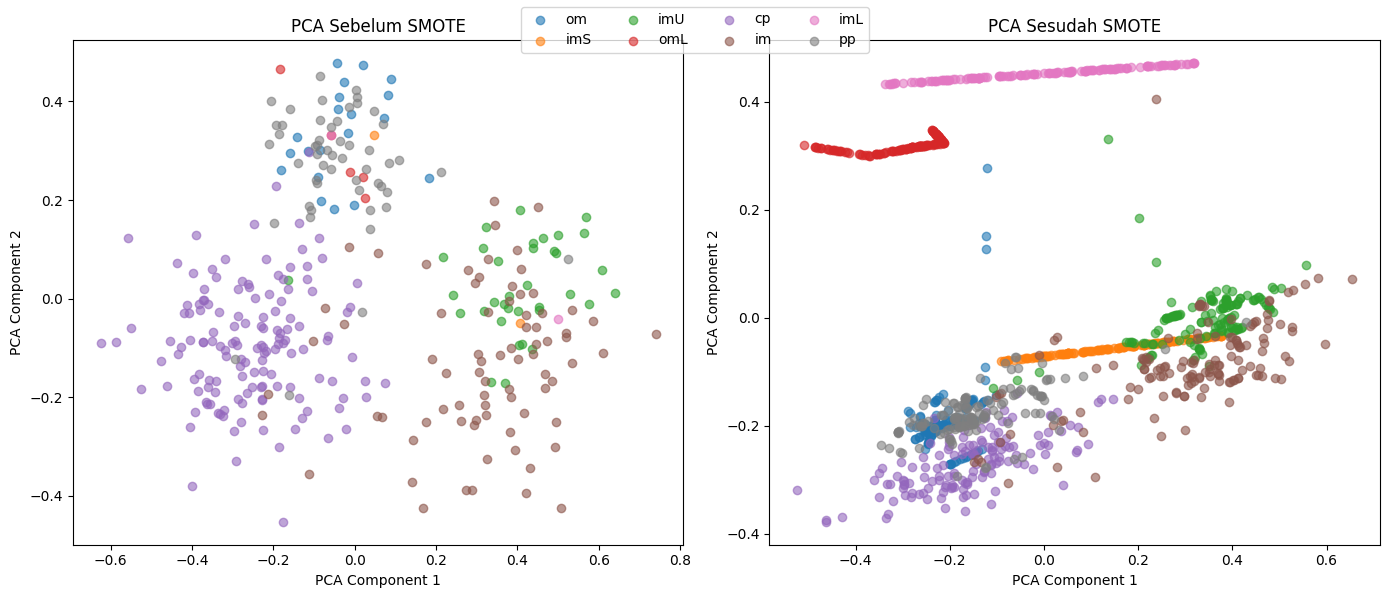

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Distribusi kelas sebelum & sesudah SMOTE
dist_before = Counter(y)
dist_after = Counter(y_res)

# Hitung data sintetis per kelas
synthetic_counts = {cls: dist_after[cls] - dist_before.get(cls, 0) for cls in dist_after}

print("Distribusi kelas sebelum SMOTE:", dist_before)
print("Distribusi kelas sesudah SMOTE:", dist_after)
print("Jumlah data sintetis yang dibuat per kelas:", synthetic_counts)

# PCA sebelum SMOTE
pca_before = PCA(n_components=2)
X_pca_before = pca_before.fit_transform(X)

# PCA sesudah SMOTE
pca_after = PCA(n_components=2)
X_pca_after = pca_after.fit_transform(X_res)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Plot sebelum SMOTE
for label in set(y):
    axes[0].scatter(
        X_pca_before[y == label, 0],
        X_pca_before[y == label, 1],
        label=label,
        alpha=0.6
    )
axes[0].set_title("PCA Sebelum SMOTE")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")

# Plot sesudah SMOTE
for label in set(y_res):
    axes[1].scatter(
        X_pca_after[y_res == label, 0],
        X_pca_after[y_res == label, 1],
        label=label,
        alpha=0.6
    )
axes[1].set_title("PCA Sesudah SMOTE")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")

# Legend global
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4)

plt.tight_layout()
plt.show()
